In [135]:
%matplotlib inline

In [136]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [137]:
# Make the tables look prettier

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [339]:
# Imports
final = pd.read_csv('final.csv', sep=";", decimal=",", index_col="id")
trans = pd.read_csv('translations.csv', sep=";", decimal=",")
sat = pd.read_csv('satisfaction.csv', sep=";", decimal=",")
likes = pd.read_csv('likes.csv', sep=";", decimal=",")

# Create categorial data and order it
setups = ["SCRATCH", "PE", "STYLE"]
texts = ["AI", "CHARLOTTE", "GARFIELD"]
participants = [421, 423, 424, 425, 427, 428, 429, 430, 432]
sat_type = ["TASK", "QUALITY"]
quality = ["Well above average", "Above average", "Average", "Below average", "Well below average"]
satisfaction = ["Very satisfied", "Somewhat satisfied", "Neutral", "Somewhat dissatisfied", "Very dissatisfied"]

def setup_categorial(column, categories):
    return column.str.upper().astype("category", categories=categories, ordered=True)

add_setups = lambda col: setup_categorial(col, setups)
add_texts = lambda col: setup_categorial(col, texts)
add_sat_type = lambda col: setup_categorial(col, sat_type)
add_quality = lambda col: col.astype("category", categories=quality, ordered=True)
add_satisfaction = lambda col: col.astype("category", categories=satisfaction, ordered=True)

for col in ["14", "15", "22", "23", "32", "33"]:
    final[col] = add_satisfaction(final[col])

for col in ["3setup", "5setup", "7setup", "9setup"]:
    final[col] = add_setups(final[col])

for col in ["3text", "5text", "7text", "9text"]:
    final[col] = add_texts(final[col])
    
for col in ["20a", "20b", "20c"]:
    final[col] = add_quality(final[col])

sat.rating = add_satisfaction(sat.rating)
sat.setup = add_setups(sat.setup)
sat.type = add_sat_type(sat.type)
sat.text = add_texts(sat.text)

likes["Setup"] = add_setups(likes["Setup"])

In [139]:
# Convenience methods

def pie(column):
    """Create a pie chart from the counts in a column."""
    final[column].value_counts().plot(kind="pie", figsize=(6,6), autopct='%.2f', fontsize=20)
    
    
def text_col(column): 
    """Format the columns with free-form textual data."""
    for i, x in enumerate(column):
        print(i + 1, x, end="\n\n")
        
def sns_style(h=6, w=12):
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.6)
    plt.figure(figsize=(w, h))

In [140]:
final.columns

Index(['time', '3text', '3setup', '4', '5text', '5setup', '6', '7text',
       '7setup', '8', '9text', '9setup', '10', '11min', '12', '13', '14', '15',
       '16', '17min', '18', '19', '20a', '20b', '20c', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30a', '31', '32', '33', '34', '35',
       'participant_id', 'time_ai_charlotte', 'time_ai_garfield', 'time_ai',
       'time_charlotte', 'time_garfield', 'time_scratch', 'time_pe',
       'time_style', 'time_percep_ai', 'time_percep_charlotte',
       'time_percep_garfield', 'time_percep_style', 'time_percep_scratch',
       'time_percep_pe', 'time_scratch_pe', 'Unnamed: 57',
       'time_scratch_style', 'order', 'scratch', 'pe', 'style', 'ai',
       'charlotte', 'garfield', '1', '2', '30b', '30c', '30d-', '30e', '30f'],
      dtype='object')

### Would you have preferred to translate from scratch without the machine translation suggestions?

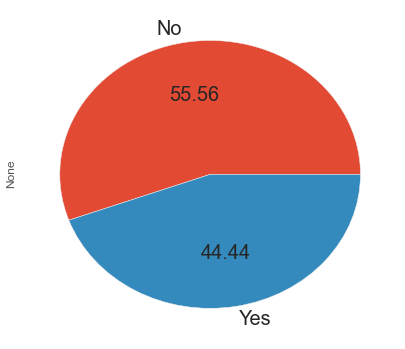

In [141]:
pie("21")

### Would you have preferred to translate from scratch without the style suggestions? 

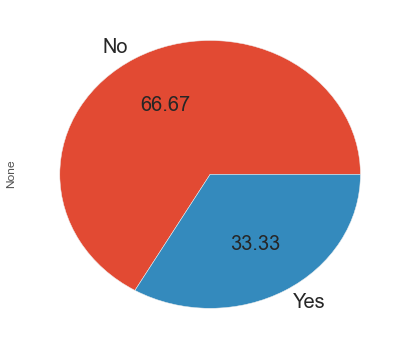

In [142]:
pie("31")

### After reading the translation brief, did you establish any priorities and restrictions for the translation?

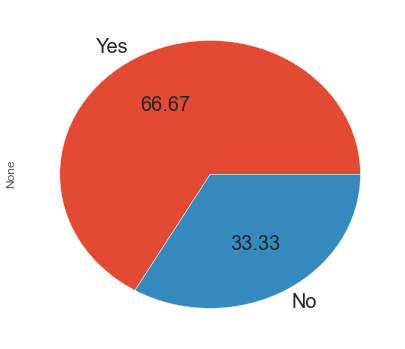

In [143]:
pie("1")

In [144]:
text_col(final["2"])

1 Detecting which words I could not understand and looking them up in a monolingual dictionary.
Searching for information about the topic treated on the text.

2 Seguir la guía de estilo de Wikipedia.

3 Que era importante seguir la guía de estilo de wikipedia.

4 nan

5 Duda que me surgía, consultaba la guía de estilo de Wikipedia.

6 It was important to take into account that Wikipedia texts have to be informative and tend to follow an impersonal and clear structure. Also there are several formules or structures that are representative of every language and do not match in the Spanish-English combination of languages.

7 nan

8 First, read and understand the text.
Second, look for information related to the text.
Third, use a machine translation tool for general understanding.
Fourth, look for the words and expressions.
Fifth, translate the text.
Sixth, revise it. 

9 nan



### Did you consult the Wikipedia Style Guide linked to in the Translation Brief?

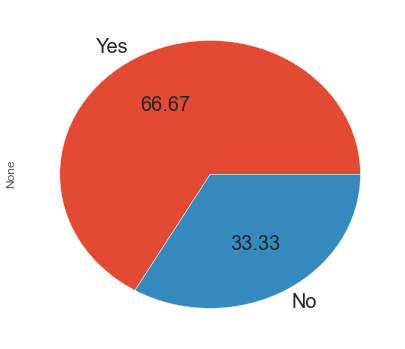

In [145]:
pie("28")

### Why?

In [146]:
text_col(final["29"])

1 I forgot about it since I'm not that used to use Style Guides.

2 Para intentar ceñirme el máximo posible a esta durante la traducción.

3 No estaba segura de qué iba en cursiva y qué no.

4 Para ver qué criterios sigue Wikipedia a la hora de escribir nombres de obras, instituciones, etc.

5 Por dudas respecto a los paréntesis o el orden cronológico.

6 I am a user of wikipedia and have translated for wikipedia before so I didn't think it was necessary.

7 No estoy acostumbrada a consultar guías de estilo y al final siempre me olvido.

8 Because if you are working for a specific site, you have to follow its guide. 

9 Para resolver los paréntesis. 



In [147]:
final[["28", "29"]]

,28,29
id,,
421,No,I forgot about it since I'm not that used to u...
432,Yes,Para intentar ceñirme el máximo posible a esta...
428,Yes,No estaba segura de qué iba en cursiva y qué no.
423,Yes,Para ver qué criterios sigue Wikipedia a la ho...
425,Yes,Por dudas respecto a los paréntesis o el orden...
430,No,I am a user of wikipedia and have translated f...
424,No,No estoy acostumbrada a consultar guías de est...
427,Yes,Because if you are working for a specific site...
429,Yes,Para resolver los paréntesis.


### Do you agree with the following statements?

In [148]:
final[["30a", "30b", "30c", "30d-", "30e", "30f"]]

,30a,30b,30c,30d-,30e,30f
id,,,,,,
421,2,2,1,1,3,4
432,1,4,1,3,5,5
428,4,2,2,3,2,4
423,3,3,2,2,1,3
425,2,4,1,4,2,5
430,3,3,3,1,3,3
424,2,2,1,2,2,2
427,1,4,1,2,3,4
429,3,1,2,1,2,3


In [149]:
for col in ["30a", "30b", "30c", "30d-", "30e", "30f"]:
    print(" --->  ".join([col, str(final[col].mean())]))

30a --->  2.33333333333
30b --->  2.77777777778
30c --->  1.55555555556
30d- --->  2.11111111111
30e --->  2.55555555556
30f --->  3.66666666667


In [150]:
for col in ["30a", "30b", "30c", "30d-", "30e", "30f"]:
    print(" --->  ".join([col, str(final[col].std())]))

30a --->  1.0
30b --->  1.09290642072
30c --->  0.726483157257
30d- --->  1.05409255339
30e --->  1.13038833052
30f --->  1.0


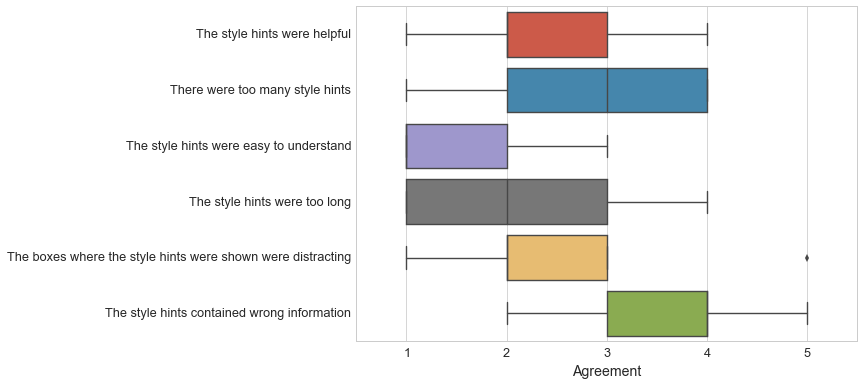

In [151]:
sns_style(w=8)
y = sns.boxplot(data=final[["30a", "30b", "30c", "30d-", "30e", "30f"]], orient="h")
#y.set_ylabel("Consideration")
y.set_xlabel("Agreement")
y.set_xlim(0.5,5.5)
y.set_yticklabels(["The style hints were helpful",
"There were too many style hints",
"The style hints were easy to understand",
"The style hints were too long",
"The boxes where the style hints were shown were distracting",
"The style hints contained wrong information"], rotation=0)

In [298]:
final.columns

Index(['time', '3text', '3setup', '4', '5text', '5setup', '6', '7text',
       '7setup', '8', '9text', '9setup', '10', '11min', '12', '13', '14', '15',
       '16', '17min', '18', '19', '20a', '20b', '20c', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30a', '31', '32', '33', '34', '35',
       'participant_id', 'time_ai_charlotte', 'time_ai_garfield', 'time_ai',
       'time_charlotte', 'time_garfield', 'time_scratch', 'time_pe',
       'time_style', 'time_percep_ai', 'time_percep_charlotte',
       'time_percep_garfield', 'time_percep_style', 'time_percep_scratch',
       'time_percep_pe', 'time_scratch_pe', 'Unnamed: 57',
       'time_scratch_style', 'order', 'scratch', 'pe', 'style', 'ai',
       'charlotte', 'garfield', '1', '2', '30b', '30c', '30d-', '30e', '30f'],
      dtype='object')

### Task satisfaction ratings

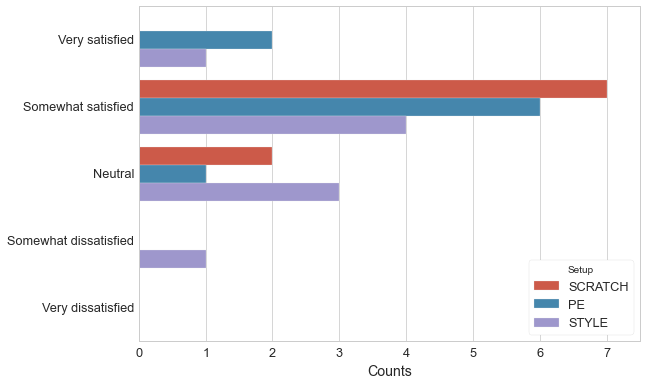

In [197]:
sns_style(w=8)
g = sns.countplot(y="rating", hue="setup", data=sat[sat.type == "TASK"])
g.set_ylabel("")
g.set_xlabel("Counts")
g.set_xlim(0,7.5)
plt.legend(title="Setup", frameon=True, loc=4)

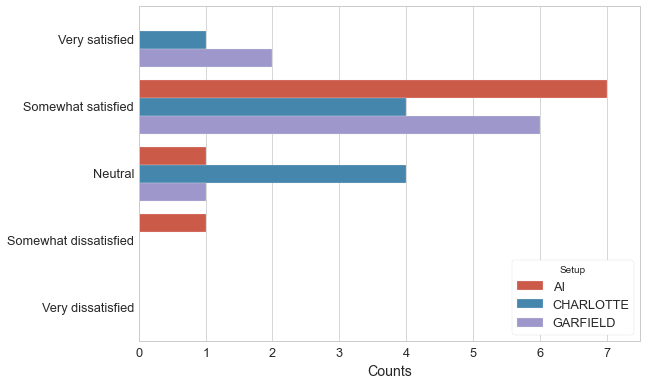

In [304]:
sns_style(w=8)
g = sns.countplot(y="rating", hue="text", data=sat[sat.type == "TASK"])
g.set_ylabel("")
g.set_xlabel("Counts")
g.set_xlim(0,7.5)
plt.legend(title="Setup", frameon=True, loc=4)

In [303]:
sat_e = pd.read_csv('satisfaction.csv', sep=";", decimal=",")
vals = pd.Series({"Very satisfied":1, 
                  "Somewhat satisfied":2, 
                  "Neutral":3, 
                  "Somewhat dissatisfied":4, 
                  "Very dissatisfied":5})

sat_e["rating"] = sat_e["rating"].map(vals)
l = sat_e.groupby(["type", "setup"]).mean()
l#print(l.to_latex())

rating
type    setup            
quality pe       1.888889
        scratch  2.666667
        style    2.444444
task    pe       1.888889
        scratch  2.222222
        style    2.444444

In [307]:
sat_e.groupby(["type", "text"]).mean()

rating
type    text               
quality ai         2.666667
        charlotte  2.444444
        garfield   1.888889
task    ai         2.333333
        charlotte  2.333333
        garfield   1.888889

In [302]:
sat_e.groupby(["type", "setup"]).std()

rating
type    setup            
quality pe       0.781736
        scratch  0.866025
        style    1.236033
task    pe       0.600925
        scratch  0.440959
        style    0.881917

In [306]:
sat_e.groupby(["type", "text"]).std()

rating
type    text               
quality ai         0.866025
        charlotte  1.013794
        garfield   1.054093
task    ai         0.707107
        charlotte  0.707107
        garfield   0.600925

### Quality satisfaction ratings

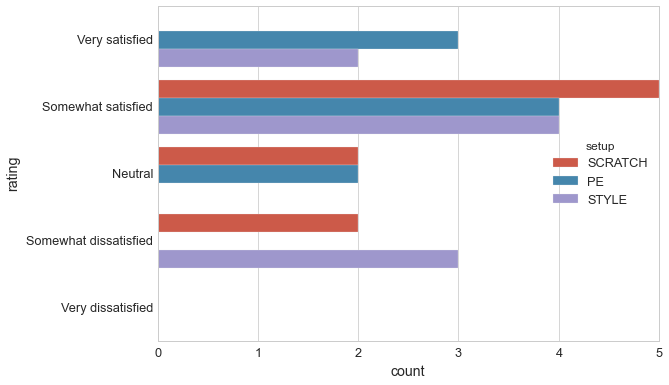

In [161]:
sns_style(w=8)
g = sns.countplot(y="rating", hue="setup", data=sat[sat.type == "QUALITY"])

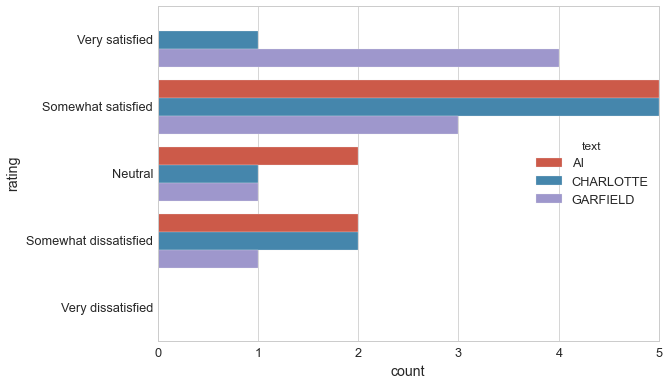

In [300]:
sns_style(w=8)
g = sns.countplot(y="rating", hue="text", data=sat[sat.type == "QUALITY"])

### Like and dislike analysis

In [262]:
# LIKE Scratch
text_col(final["12"])

1 It was easy and simple.

2 Era fácil realizar la traducción y que resultase en una lectura fluida.

3 Es un tema que me gusta y tenía prácticamente libertad total para traducir.

4 Buscar referencias (fotos, etc.) externas para traducir correctamente el texto.

5 El tema

6 The topic, and knowing that even if it seemed a very easy text to translate it is very easy to make a style mistake. Some translators or readers may not notice the pattern of that kind of descriptive text.

7 El tema sobre todo. Mientras buscaba información sobre la obra de las mujeres suspendidas de la autora (para saber cómo traducir el término) he podido ver su trabajo. 
El formato del texto, la biografía, también me resulta muy agradable para traducir.

8 I didn't really like it because I didn't feel comfortable with the topic. 

9 Que eran frases cortas.



In [263]:
# LIKE PE
text_col(final["18"])

1 The suggestions were somehow useful to get a quick idea of what the text was about.

2 Tener que informarme sobre la autora.

3 Era una traducción sencilla.

4 Poder compararlo con la traducción automática que se proporciona.

5 El juego de palabras

6 The feeling of knowing that I can work better than a machine, even if it seems that a machine can translate a full text. When reading it, it didn't make any sense. 

7 Ver el resultado de una traducción automática, fijarme en los detalles erróneos que había y poder darle mi toque para adecuar la traducción final.

8 It provided me an automatic translation, so it was easier to translate. 

9 Que era bastante general y no incluía demasiada investigación. 



In [264]:
# LIKE Style
text_col(final["26"])

1 The text itself and the topic were funny. I like Garfield.
The text seemed simple and easy but it was quite challenging actually.

2 Es un campo que me interesa y facilita la labor de traducir.

3 Diría que nada en especial.

4 Buscar las referencias y nombres de los personajes en español.

5 Nada, lo siento.

6 It was very easy and I found an interesting cultural clash that I could decide myself how to act upon.

7 El estilo un poco más complejo que los otros dos textos.

8 I used to watch Garfield, so it was easier for me to understand the text and translating it. 

9 Que conocía la temática. 



In [267]:
# DISLIKE Scratch
text_col(final["13"])

1 It was not as amusing or interesting as the other two.

2 El uso de comas y paréntesis en el original.

3 Tener que mirar una guía de estilo con la que no estoy familiarizada para asegurarme de que lo escribía todo bien.

4 Nada.

5 La puntuación

6 The same thing. It is nice to realize that there is a pattern you should follow (and identifying it), but it makes the translator less free.

7 No hay nada en especial que me desagrade. Quizá el hecho de tener que utilizar código html para editar el formato del texto, pero eso es más la herramienta del cuestionario que no el texto.

8 I had to look for information and some expressions. 

9 Que no había suficiente contexto. 



In [265]:
# DISLIKE PE
text_col(final["19"])

1 The translation machine suggestions sometimes made me feel hesitant and I was not sure whether my version or the machine's was the most correct one.

2 Decidir si traducir o no los títulos de sus obras.

3 Dejar algunas traducciones de las que ya estaban hechas simplemente porque no se me ha ocurrido nada mejor.

4 Nada.

5 La terminología

6 Working more than necessary because of something that was supposed to help me do my task.

7 Falsos sentidos de la traducción automática que han supuesto un problema de traducción.

8 I had to look for pictures and videos in order to translate some words and expressions, like "inversion". 

9 Que había algún concepto como "winter IA" que no conocía. 



In [266]:
# DISLIKE Style
text_col(final["27"])

1 The humour that the reader and yourself as a translator would expect from a text like this one makes you feel more self-aware of this humouristic tone that your translation must have in order be a good one.

2 La terminología utilizada para referirse a los periodos de tiempo relativos a las subvenciones.

3 Los comentarios. Me hacían dudar del estilo y de mi traducción. No me importa que aparezcan y me hagan prestar más atención a mi traducción pero me frustraba intentar quitarlos y que volvieran a aparecer.

4 Las limitaciones impuestas por las indicaciones y la extensión del texto, sin pausas largas.

5 Nada, tampoco.

6 It was also very structured.

7 El estilo también. Al ser más complejo también era más complicado.

8 Nothing. 

9 Que eran frases muy largas. Además los comentarios hacían dudar sobre si mi propuesta era más o menos correcta. 



(0, 5)

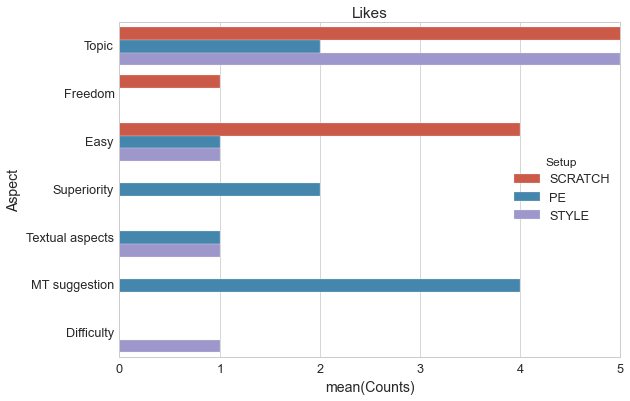

In [296]:
sns_style(w=8)
st = sns.barplot(x="Counts", y="Aspect", hue="Setup", data=likes[likes.like == "like"])
st.errorbar = None
st.set_title("Likes")
st.set_xlim(0,5)

(0, 5)

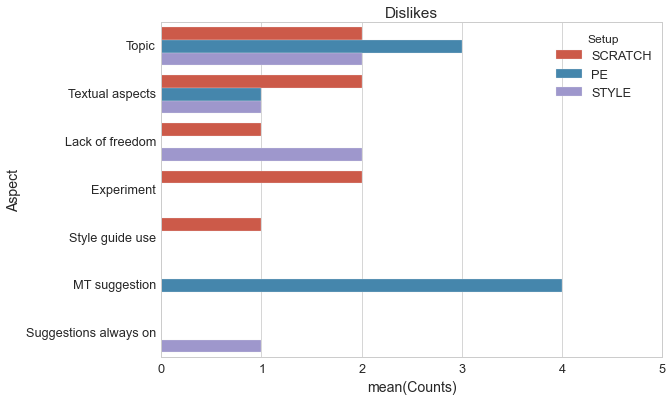

In [297]:
sns_style(w=8)
st = sns.barplot(x="Counts", y="Aspect", hue="Setup", data=likes[likes.like == "dislike"])
st.errorbar = None
st.set_title("Dislikes")
st.set_xlim(0,5)

### Hard and easy analysis

(0, 5)

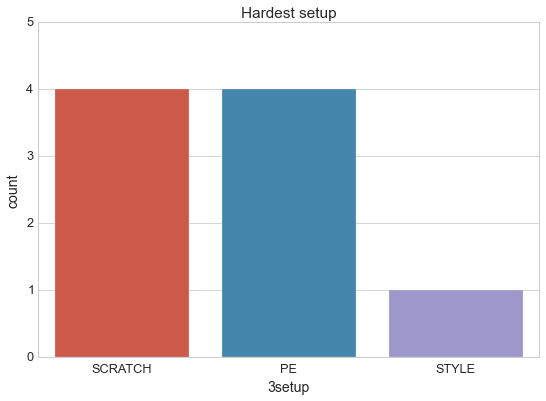

In [261]:
sns_style(w=8)
st = sns.countplot(x="3setup", data=final)
st.set_title("Hardest setup")
st.set_ylim(0,5)

(0, 5)

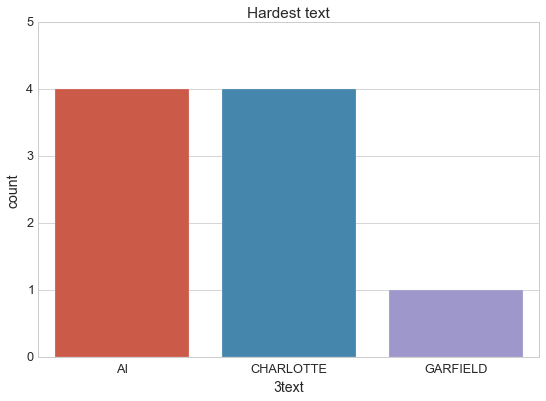

In [256]:
sns_style(w=8)
st = sns.countplot(x="3text", data=final)
st.set_title("Hardest text")
st.set_ylim(0,5)

In [259]:
text_col(final["4"])

1 I didn't know much about the topic and I had to look some information about the artist and her work to know which would be the most pertinent translation.

2 Contenía títulos de obras artísticas que finalmente decidí traducir.

3 Utiliza palabras más técnicas que eran más difícil de traducir sin buscarlas primero para asegurarme de que mi traducción era correcta.

4 Porque aparecen numerosas referencias y términos difíciles de traducir si no se conoce la obra de la artista.

5 Por cuestiones como la mayúscula en "gobierno" o no o el juego de palabras con "<i>AI winters" and summers</i>.

6 After trying to make the relevant changes in the automatic translation, I realized it was easier to remake it myself. It doubled the amount of work.

7 Porque los fragmentos eran bastante inconexos y había vocabulario sobre financiación. Mi (escaso) conocimiento sobre el tema de inteligencia artificial comparado con una biografía o un texto sobre las tiras cómicas de Garfield también ha supuesto un

(0, 5)

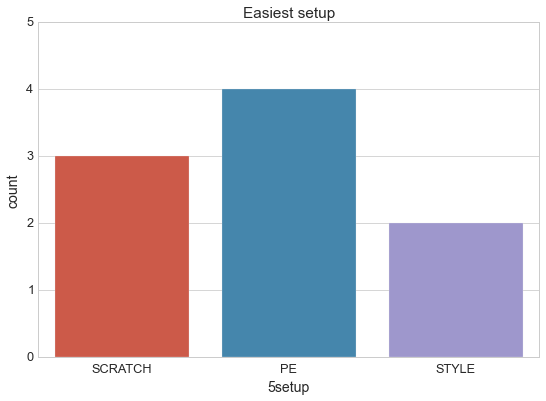

In [258]:
sns_style(w=8)
st = sns.countplot(x="5setup", data=final)
st.set_title("Easiest setup")
st.set_ylim(0,5)

(0, 5)

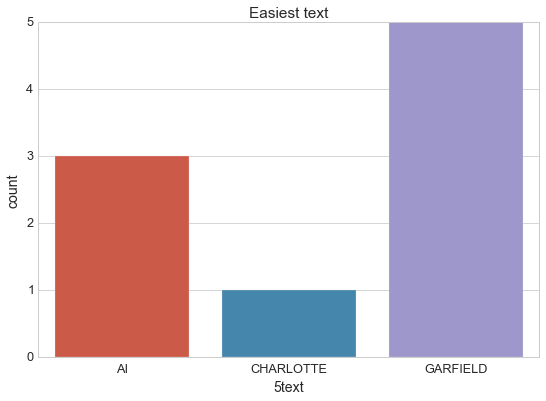

In [257]:
sns_style(w=8)
st = sns.countplot(x="5text", data=final)
st.set_title("Easiest text")
st.set_ylim(0,5)

In [260]:
text_col(final["6"])

1 The sentences were simple and there was no hidden intention or humour. You just needed to translate the information as it was in the original text.

2 Es un texto general y sin terminología técnica.

3 No contenía mucha terminología complicada y conozco un poco el tema.

4 Porque el texto está compuesto de frases cortas y simples.

5 Texto sencillo, sin grandes cuestiones ortotipográficas.

6 The topic was easy to write about once the terminology problems were solved.

7 La pos-edición es más fácil que la traducción en sí. Además se trataba de un tema conocido para mí.

8 Because the program provided me an automatic translation and it was faster to translate. 

9 Because I am familiar with Garfield's cartoons. 



### Control over one's own translation

(0, 5)

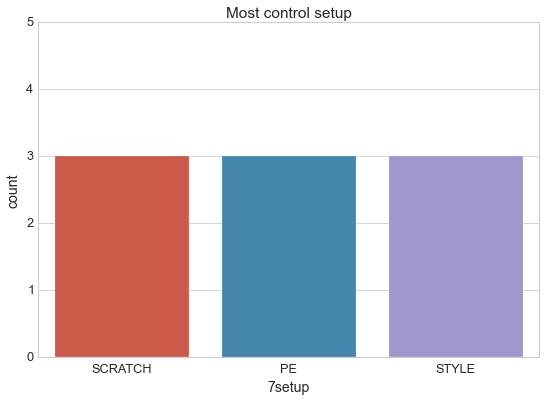

In [271]:
sns_style(w=8)
st = sns.countplot(x="7setup", data=final)
st.set_title("Most control setup")
st.set_ylim(0,5)

(0, 5)

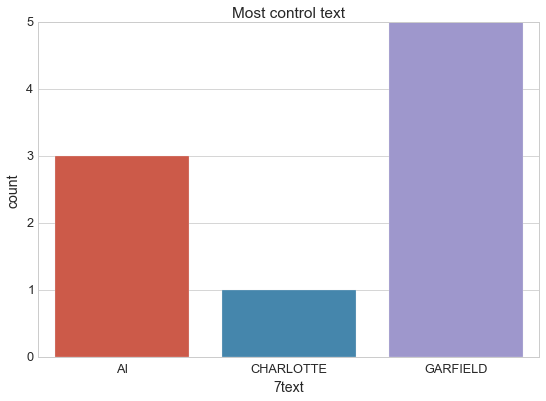

In [272]:
sns_style(w=8)
st = sns.countplot(x="7text", data=final)
st.set_title("Most control text")
st.set_ylim(0,5)

In [276]:
text_col(final["8"])

1 In the Text 2 the suggestions made me doubt a bit about which would be the correct translation for some words. And in the Text 3 I wanted to express the humour associated with Garfield's comic strips, which make me feel really doubtful about my translation.

2 Ya conocía el tema que trata el texto (Garfield).

3 Porque no tenía una traducción ya hecha que en cierta forma me podía influir ni comentarios que me hacían dudar aún más de lo normal de mi traducción.

4 Porque el texto no presenta dificultades mayores (excepto algún concepto) ni hace referencia a conceptos o elementos externos que puedan tener un efecto sobre la forma de traducir el texto.

5 Porque he comparado qué hace Wikipedia en los casos que me causaban duda y he seguido las directrices del manual de estilo.

6 Because I could see myself working over some previous work that had already been done, and I could feel why a human translator and a machine translator are not at the same level. 

7 Porque sólo he tenido que p

(0, 5)

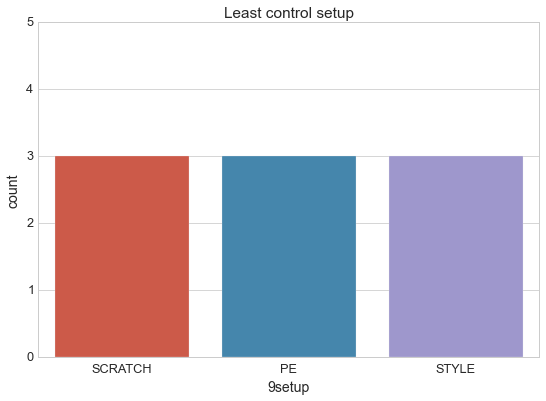

In [274]:
sns_style(w=8)
st = sns.countplot(x="9setup", data=final)
st.set_title("Least control setup")
st.set_ylim(0,5)

(0, 5)

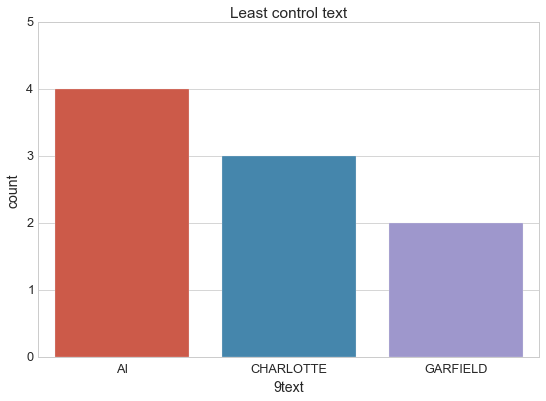

In [275]:
sns_style(w=8)
st = sns.countplot(x="9text", data=final)
st.set_title("Least control text")
st.set_ylim(0,5)

In [278]:
text_col(final["10"])

1 It was a bit difficult to paraphrase the translation since I already had the sentences structure and the words provided by the machine translation. Sometimes it's easier to translate from scratch than to modify something already translated.

2 Desconozco la terminología que se utilizan en castellano para hablar de inteligencia artificial.

3 Parte de la traducción que estaba hecha sí que estaba bien y, por lo tanto, no la he cambiado, pero creo que si no hubiera sido por la influencia de la traducción que ya estaba hecha quizás no lo habría traducido igual.

4 Porque aparecen numerosas indicaciones en la pantalla, lo que limita las posibilidades de traducir. Además, se hace referencia a algunos elementos externos (como el libro de tiras cómicas) que, al traducirlos, pueden no corresponderse a la realidad.

5 No conocía el tema y por la cuestión del juego de palabras.

6 During the first translation I felt that the kind of text (biography, artistic terminology) follows such a clear st

### MT Quality

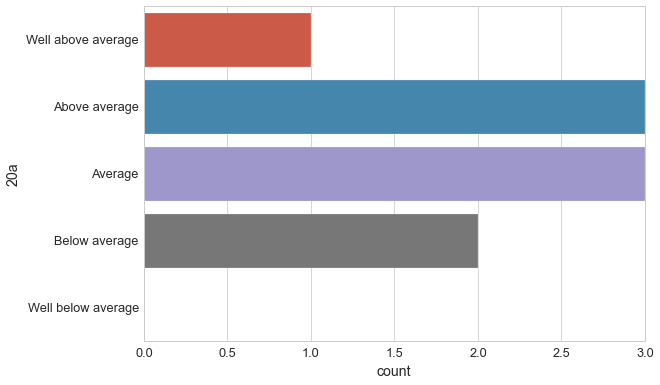

In [317]:
sns_style(w=8)
st = sns.countplot(y="20a", data=final)

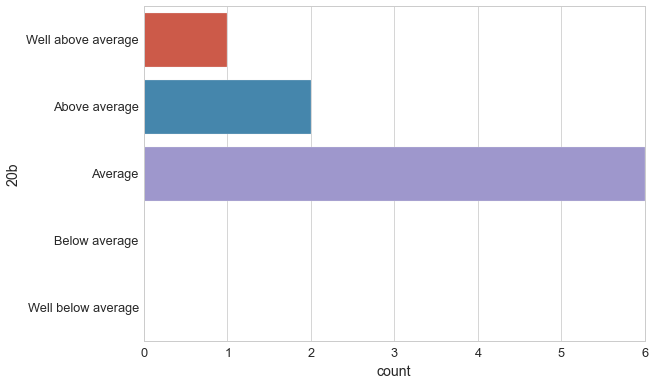

In [319]:
sns_style(w=8)
st = sns.countplot(y="20b", data=final)

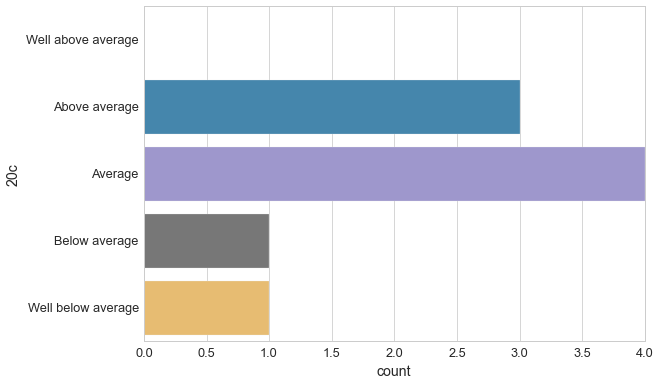

In [318]:
sns_style(w=8)
st = sns.countplot(y="20c", data=final)

In [342]:
vals = pd.Series({"Well above average":1, 
                  "Above average":2, 
                  "Average":3, 
                  "Below average":4, 
                  "Well below average":5})
final["20a"] = final["20a"].map(vals)
final["20b"] = final["20b"].map(vals)
final["20c"] = final["20c"].map(vals)

In [343]:
final[["20a", "20b", "20c"]].describe()

,20a,20b,20c
count,9.000000,9.000000,9
mean,2.666667,2.555556,3
std,1.000000,0.726483,1
min,1.000000,1.000000,2
25%,2.000000,2.000000,2
50%,3.000000,3.000000,3
75%,3.000000,3.000000,3
max,4.000000,3.000000,5
